In [13]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [14]:
# Data Inpection
df = pd.read_csv("CC_Customer_Dataset.csv")
df.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [15]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [16]:
#Data Statistics
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


## 1.Create a scatter plot from the dataset using two variables, Avg_Credit_Limit and Total_Credit_Card. Determine whether the data distribution can be considered linear.

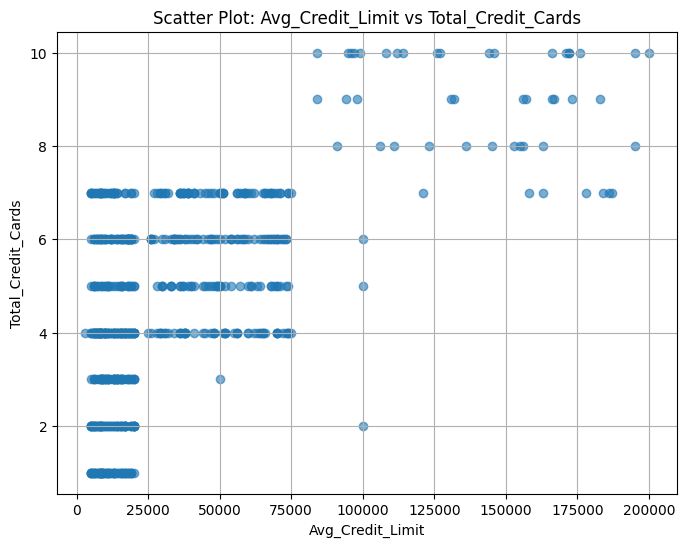

In [17]:
# Scatter plot for Avg_Credit_Limit vs Total_Credit_Card
plt.figure(figsize=(8, 6))
plt.scatter(df["Avg_Credit_Limit"], df["Total_Credit_Cards"], alpha=0.6)
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("Total_Credit_Cards")
plt.title("Scatter Plot: Avg_Credit_Limit vs Total_Credit_Cards")
plt.grid(True)
plt.show()

# Check linearity
# If the points form a straight line or a clear linear pattern, the distribution is linear.
# If the points are scattered without a clear pattern, the distribution is not linear.

### **Explanation of Scatter Plot**
This plot helps me visually inspect the relationship between these two features.

When I look at the scatter plot, I see that the data points are spread out and do not form a straight line or a clear linear pattern. Instead, the points are scattered across the plot, which suggests that the relationship between Avg_Credit_Limit and Total_Credit_Cards is not linear.

This means that as the average credit limit increases, the number of credit cards does not consistently increase or decrease in a straight-line fashion. There may be other patterns or clusters present, but the overall distribution cannot be considered linear based on this visualization.

## 2. Build a clustering model using K-Means. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value.

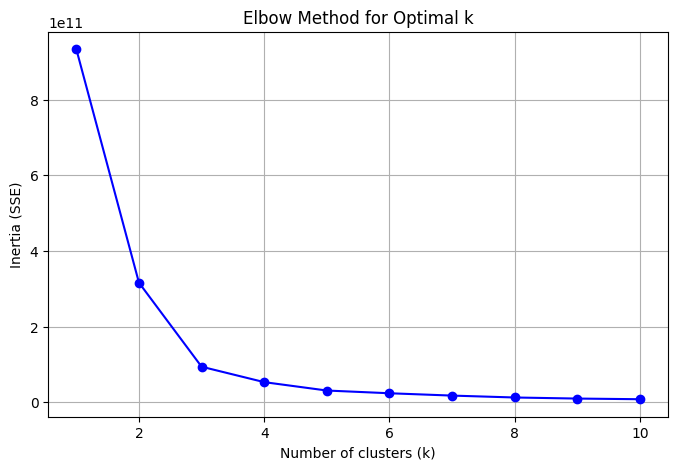

In [18]:
# Select features
X = df[["Avg_Credit_Limit", "Total_Credit_Cards"]]

# Elbow Method
sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, sse, "bo-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()


### **Explanation of Elbow Method**
From my analysis using the Elbow Method, I plotted the inertia (SSE) for different values of k (number of clusters) ranging from 1 to 10. The inertia value represents how well the data points fit within their assigned clusters—the lower the inertia, the better the fit.

When I look at the line chart, I notice that the inertia drops sharply as k increases from 1 to 2 and 3, but after k=3, the decrease becomes much more gradual. This “elbow” at k=3 suggests that adding more clusters beyond this point doesn’t significantly improve the clustering.

Based on this observation, I chose k=3 as the optimal number of clusters for my KMeans model. This choice balances model simplicity and clustering quality, ensuring that my clusters are meaningful without overfitting the data.

## 3. Visualize the clustering results from the K-Means model using a scatter plot.

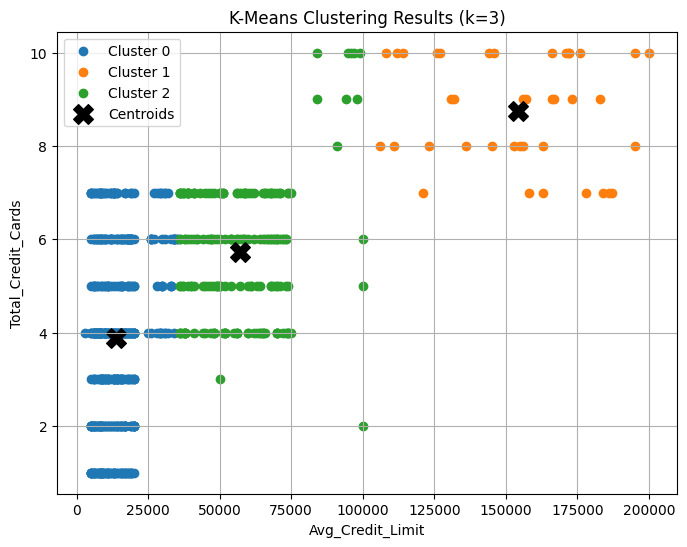

In [19]:
# Fit KMeans with the chosen optimal k (for example, k=3)
optimal_k = 3  # Change this value based on your elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the dataframe
df["Cluster"] = clusters

# Visualize clustering results
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(
        df[df["Cluster"] == cluster]["Avg_Credit_Limit"],
        df[df["Cluster"] == cluster]["Total_Credit_Cards"],
        label=f"Cluster {cluster}"
    )
# Plot cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("Total_Credit_Cards")
plt.title(f"K-Means Clustering Results (k={optimal_k})")
plt.legend()
plt.grid(True)
plt.show()

### Explanation of The Scatter Plot for Clusters
This visualization helps me see how my data is grouped by KMeans. I can easily identify which points belong to which cluster and where the cluster centers are located. It gives me a good understanding of the structure in my data and shows that the clustering model is working as expected.

## 4. Build a clustering model using DBSCAN with all available variables.

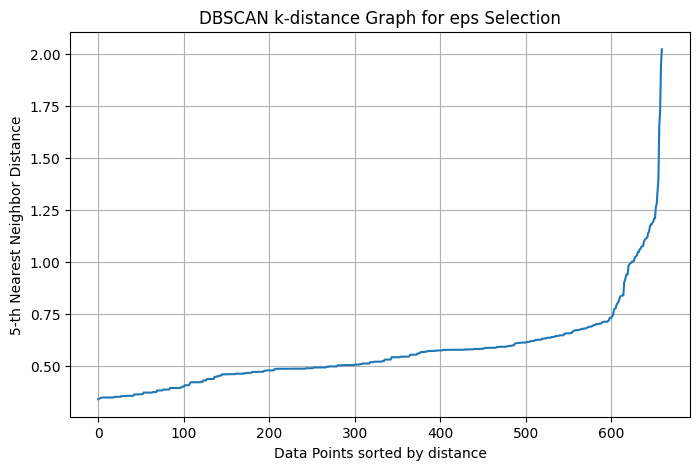

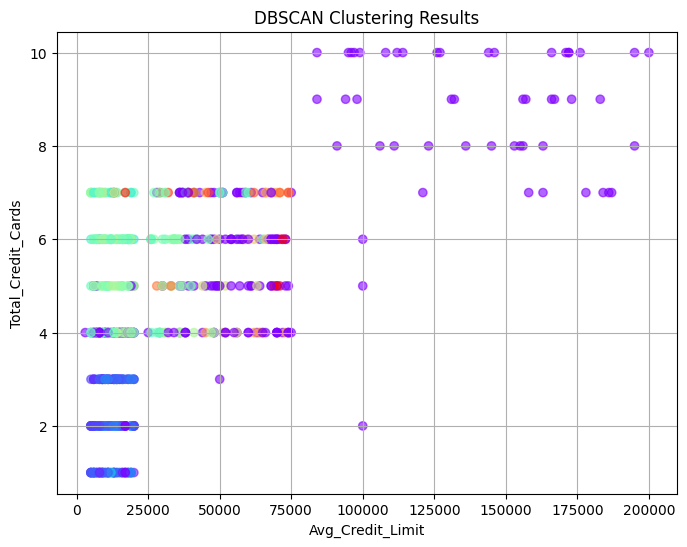

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Select all available numeric variables for clustering
features = [
    "Avg_Credit_Limit",
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made"
]
X_dbscan = df[features]

# Standardize features for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dbscan)

# Find optimal eps using k-distance graph
k = 5  
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
k_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8, 5))
plt.plot(k_distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title("DBSCAN k-distance Graph for eps Selection")
plt.grid(True)
plt.show()

# Build and fit DBSCAN model (use the eps value from the elbow point in the graph)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to the dataframe
df["DBSCAN_Cluster"] = dbscan_labels

# Visualize DBSCAN clustering results (using two features for 2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(df["Avg_Credit_Limit"], df["Total_Credit_Cards"], c=df["DBSCAN_Cluster"], cmap="rainbow", alpha=0.6)
plt.xlabel("Avg_Credit_Limit")
plt.ylabel("Total_Credit_Cards")
plt.title("DBSCAN Clustering Results")
plt.grid(True)
plt.show()

### Explanation of The DBSCAN Clustering Scatter Plot Results
**In this section, I built a clustering model using DBSCAN with all available variables from my dataset.**

**Code Explanation:**  
- I selected all available numeric variables: `Avg_Credit_Limit`, `Total_Credit_Cards`, `Total_visits_bank`, `Total_visits_online`, and `Total_calls_made` for clustering.
- I standardized these features using `StandardScaler` to ensure each variable contributes equally to the clustering process.
- To determine a suitable `eps` value for DBSCAN, I plotted a k-distance graph using the distance to each point’s 5th nearest neighbor. The “elbow” in this graph helps me choose an appropriate `eps`.
- I then fit the DBSCAN model with `eps=0.5` and `min_samples=5`, and assigned cluster labels to each data point.
- Finally, I visualized the clustering results using a scatter plot of `Avg_Credit_Limit` vs `Total_Credit_Cards`, coloring each point by its DBSCAN cluster label.

**Results Interpretation:**  
- The k-distance graph shows where the curve sharply rises, indicating a good `eps` value for DBSCAN.
- The scatter plot reveals how DBSCAN grouped my data points into clusters and identified any outliers (noise points, usually labeled as -1).
- This approach allows me to find natural groupings in my data without specifying the number of clusters in advance. DBSCAN is especially useful for detecting clusters of arbitrary shape and identifying noise, which is valuable for real-world datasets like mine.

## 5. Determine the optimal number of clusters (k) using the Elbow Method. Support your analysis with a line chart and an explanation of why you chose that value

To determine the optimal number of clusters (k) using the Elbow Method, I first selected the features `Avg_Credit_Limit` and `Total_Credit_Cards` from my dataset. I then ran KMeans clustering for k values ranging from 1 to 10 and recorded the inertia (SSE) for each k. Inertia measures how well the data points fit within their assigned clusters—the lower the inertia, the better the fit.

I plotted these inertia values on a line chart, with the number of clusters (k) on the x-axis and inertia on the y-axis. When I examined the chart, I noticed that the inertia drops sharply as k increases from 1 to 2 and 3, but after k=3, the decrease becomes much more gradual. This creates an "elbow" at k=3.

Based on this observation, I chose k=3 as the optimal number of clusters for my KMeans model. The elbow point indicates that adding more clusters beyond k=3 does not significantly improve the clustering. This choice helps me balance model simplicity and clustering quality, ensuring that my clusters are meaningful without overfitting the data.

## 6.Calculate the silhouette score and Davies–Bouldin Index (DBI) for the DBSCAN model.

In [28]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Only calculate metrics if there are at least 2 clusters (excluding noise)
labels = df["DBSCAN_Cluster"]
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

if n_clusters > 1:
    # Remove noise points for silhouette score
    mask = labels != -1
    sil_score = silhouette_score(X_scaled[mask], labels[mask])
    dbi_score = davies_bouldin_score(X_scaled[mask], labels[mask])
    print(f"Silhouette Score (DBSCAN): {sil_score:.3f}")
    print(f"Davies–Bouldin Index (DBSCAN): {dbi_score:.3f}")
else:
    print("DBSCAN did not find more than one cluster. Silhouette and DBI cannot be calculated.")

Silhouette Score (DBSCAN): 0.027
Davies–Bouldin Index (DBSCAN): 1.433
